<a href="https://colab.research.google.com/github/KennyOlat/kennyOlat/blob/main/AUTOMOBILE_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.patches as mpatches


In [2]:
#importing the data from the directory

from google.colab import files
uploaded = files.upload()

Saving Automobile_data.csv to Automobile_data.csv


In [3]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['Automobile_data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
auto=pd.read_csv('Automobile_data.csv')

print(auto)


     symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1

In [5]:
print(auto.shape)

(205, 26)


In [6]:
type(auto)

pandas.core.frame.DataFrame

In [7]:
print(auto.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [8]:
print(auto.tail())

     symboling normalized-losses   make fuel-type aspiration num-of-doors  \
200         -1                95  volvo       gas        std         four   
201         -1                95  volvo       gas      turbo         four   
202         -1                95  volvo       gas        std         four   
203         -1                95  volvo    diesel      turbo         four   
204         -1                95  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
200      sedan          rwd           front       109.1  ...          141   
201      sedan          rwd           front       109.1  ...          141   
202      sedan          rwd           front       109.1  ...          173   
203      sedan          rwd           front       109.1  ...          145   
204      sedan          rwd           front       109.1  ...          141   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
2

In [9]:
# identify and replace the missing values

auto.replace('?', np.nan, inplace=True)
auto.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [10]:
# Evaluating the missing values (missing values are replaces with true, otherwise false)
missing_dt=auto.isnull()
missing_dt.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# counting the number of missing values in all the attributes
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

missing value summary


normalized losses = 41
number of doors =2
bore = 4
stroke = 4
horsepower = 2
peak rmp=2
price = 4

For missing values these can be done
1) removing the entire column
2) removing the entire row
3) replacing missing values with mean if evenly distributed
4) replacing missing values with median if we have outliers;  that is if there is variation of some values from others

In [12]:
# replacing the Nan values with the mean of the column

columns = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for column in columns:
  normalized_mean = auto[column].astype(float).mean(axis=0)
  auto[column].replace(np.nan, normalized_mean, inplace=True)

In [13]:
auto['num-of-doors'].value_counts() #replacing NaN in various columns with most frequent class of their columns

four    114
two      89
Name: num-of-doors, dtype: int64

In [14]:
auto['num-of-doors'].value_counts().idxmax() #using idxmax to calculate the frequent occured types

'four'

In [15]:
#repacing the missing number of doors with the most frequently occured type
auto['num-of-doors'].replace(np.nan, 'four', inplace=True)

In [16]:
# for certain column, drop the row with NaN in price column
auto.dropna(subset=['price'], axis=0, inplace = True)

#reset index, because two rows are dropped
auto.reset_index(drop=True, inplace=True)

In [17]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


ANOTHER METHOD TO DEAL WITH REPLACING NAN WITH MEAN INDIVIDUALLY

In [25]:
df_temp = auto[auto['normalized-losses']!='?']
normalised_mean = df_temp['normalized-losses'].astype(int).mean()
auto['normalized-losses'] = auto['normalized-losses'].replace('?',normalised_mean).astype(int)

df_temp = auto[auto['price']!='?']
normalised_mean = df_temp['price'].astype(float).mean()
auto['price'] = auto['price'].replace('?',normalised_mean).astype(float)

df_temp = auto[auto['horsepower']!='?']
normalised_mean = df_temp['horsepower'].astype(int).mean()
auto['horsepower'] = auto['horsepower'].replace('?',normalised_mean).astype(int)

df_temp = auto[auto['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
auto['peak-rpm'] = auto['peak-rpm'].replace('?',normalised_mean).astype(int)

df_temp = auto[auto['bore']!='?']
normalised_mean = df_temp['bore'].astype(float).mean()
auto['bore'] = auto['bore'].replace('?',normalised_mean).astype(float)

df_temp = auto[auto['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
auto['stroke'] = auto['stroke'].replace('?',normalised_mean).astype(float)

auto['num-of-doors'] = auto['num-of-doors'].replace('?','four')
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
auto.dtypes   #checking the datatype in each of the column

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [27]:
# correcting the datatype of some of the features printed above

auto[['bore', 'stroke']] = auto[['bore', 'stroke']].astype('float')
auto[['normalized-losses']] = auto[['normalized-losses']].astype('int')
auto[['price']] = auto[['price']].astype('float')
auto[['peak-rpm']] = auto[['peak-rpm']].astype('float')

In [28]:
#printing out the datatypes after conversion

auto.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [29]:
# summary of the features by using describe() function

auto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


DATA STANDARDIZATION

In [30]:
# conversion of miles-per-gallon unit of fuel consumption to litre per km
#formular for unit conversion is L/100km = 235/mpg

auto['city-L/100km'] = 235/auto['city-mpg']
auto['highway-L/100km'] = 235/auto['highway-mpg']
auto[['city-L/100km', 'city-mpg', 'highway-L/100km', 'highway-mpg']].head()

,city-L/100km,city-mpg,highway-L/100km,highway-mpg
0,11.190476,21,8.703704,27
1,11.190476,21,8.703704,27
2,12.368421,19,9.038462,26
3,9.791667,24,7.833333,30
4,13.055556,18,10.681818,22


DATA NORMALIZATION

In [31]:
# replacing the (original-value) by (original-value)/(maximum-value)

auto['length'] = auto['length']/auto['length'].max()
auto['width'] = auto['width']/auto['width'].max()
auto['height'] = auto['height']/auto['height'].max()
auto[['length', 'width','height']].head()

,length,width,height
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


BINNING
This is the categorization of data for effective memory utilization

In [32]:
auto['horsepower']=auto['horsepower'].astype(float,copy=True)

binwidth = (max(auto['horsepower'])-min(auto['horsepower']))/4 #creating four bin of equal bandwidth, the fourth is because
binwidth                                                        #function 'cut' includes the rightmost value

60.0

In [33]:
# there is need to build bin array with minimum value to a maximum, with bandwidth calculate above
#the bins will be the values used to determine when one bin ends and another begins:

bins = np.arange(min(auto['horsepower']), max(auto['horsepower']), binwidth)
bins

array([ 48., 108., 168., 228.])

In [34]:
#setting group names

group_names = ['Low', 'Medium', 'High']

In [35]:
#applying the function 'cut' to determine what each value of 'auto['horsepower'] value belongs to

auto['horsepower-binned'] = pd.cut(auto['horsepower'], bins, labels=group_names, include_lowest=True)
auto[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Low
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,160.0,Medium


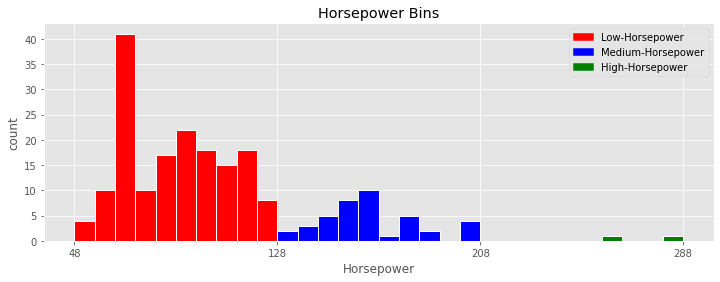

In [36]:
#BINNING VISUALIZATION

mpl.style.use(['ggplot'])

total_categories = 3

#getting the x-trick values
count, bin_edges = np.histogram(auto['horsepower'], 3)
fig, ax= plt.subplots(figsize=(12,4))
N, bins, patches = ax.hist(auto['horsepower'], bins=total_categories*10, edgecolor='white', linewidth = 1)
for i in range(0,10):
  patches[i].set_facecolor('r')
for i in range(10,20):
  patches[i].set_facecolor('b')
for i in range(20,30):
  patches[i].set_facecolor('g')

ax.set_xticks(bin_edges)

ax.set_title('Horsepower Bins')
ax.set_ylabel('count')
ax.set_xlabel('Horsepower')

red_patch = mpatches.Patch(color = 'red', label='Low-Horsepower')
blue_patch = mpatches.Patch(color = 'blue', label='Medium-Horsepower')
green_patch = mpatches.Patch(color = 'green', label='High-Horsepower')
plt.legend(handles=[red_patch, blue_patch, green_patch])

plt.show()

In [37]:
#creating indicators variable (or dummy variable)

auto.columns
#Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',])

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [38]:
auto['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 205, dtype: object

In [39]:
dummy_varable_1 = pd.get_dummies(auto['fuel-type'])     #one heart encoding [creating columns for diesel and gas, put 0 for where there is diesel]
dummy_varable_1                                         # and 1 otherwise; the same is applicable to gas creating 1 where there is gas and 0, otherwise

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [40]:
dummy_varable_1 = pd.get_dummies(auto['fuel-type'])
dummy_varable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_varable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


diesel has been represented by 0 and gas by 1

In [41]:
#concatenation of the data variable into the original dataset

# merge dataframe auto and dummy_variable_1
auto = pd.concat([auto, dummy_varable_1], axis=1)

#drop the original column 'fuel-type' from auto
auto.drop('fuel-type', axis=1, inplace=True)

In [42]:
auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495.0,11.190476,8.703704,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500.0,11.190476,8.703704,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450.0,13.055556,10.681818,Medium,0,1


Repeating the same step for 'aspiration' column

In [43]:
dummy_varable_2 = pd.get_dummies(auto['aspiration'])
dummy_varable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
dummy_varable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [44]:
#concatenation of the data variable into the original dataset

# merge dataframe auto and dummy_variable_1
auto = pd.concat([auto, dummy_varable_2], axis=1)

#drop the original column 'aspiration' from auto
auto.drop('aspiration', axis=1, inplace=True)

In [45]:
auto.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,21,27,13495.0,11.190476,8.703704,Medium,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,21,27,16500.0,11.190476,8.703704,Medium,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,18,22,17450.0,13.055556,10.681818,Medium,0,1,1,0


In [46]:
auto.to_csv('clean_auto_csv')

EXPLORATORY DATA ANALYSIS